In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/OnlineNewsPopularity.csv')

In [ ]:
# Remove the URL column, it's not needed for analysis
df = df.drop(columns=['url'])

In [ ]:
# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

         timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  3444.000000      3444.000000        3444.000000       3444.000000   
mean    701.637631         9.820848         481.257259          0.562796   
std      17.259881         1.936583         408.015883          0.118981   
min     671.000000         4.000000           0.000000          0.000000   
25%     687.000000         8.000000         220.000000          0.487514   
50%     702.000000        10.000000         347.000000          0.562925   
75%     716.000000        11.000000         616.000000          0.635725   
max     731.000000        18.000000        4125.000000          1.000000   

        n_non_stop_words   n_non_stop_unique_tokens    num_hrefs  \
count        3444.000000                3444.000000  3444.000000   
mean            0.991580                   0.706633     9.228223   
std             0.091389                   0.120763     9.055331   
min             0.000000                   

In [ ]:
# Handle missing values
df.dropna(inplace=True)

In [ ]:
# Check the column names
print(df.columns)

# Print the first few rows of the DataFrame
print(df.head())


Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [ ]:
X = df.drop(columns=[' shares'])
y = df[' shares']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

RandomForestRegressor(random_state=0)

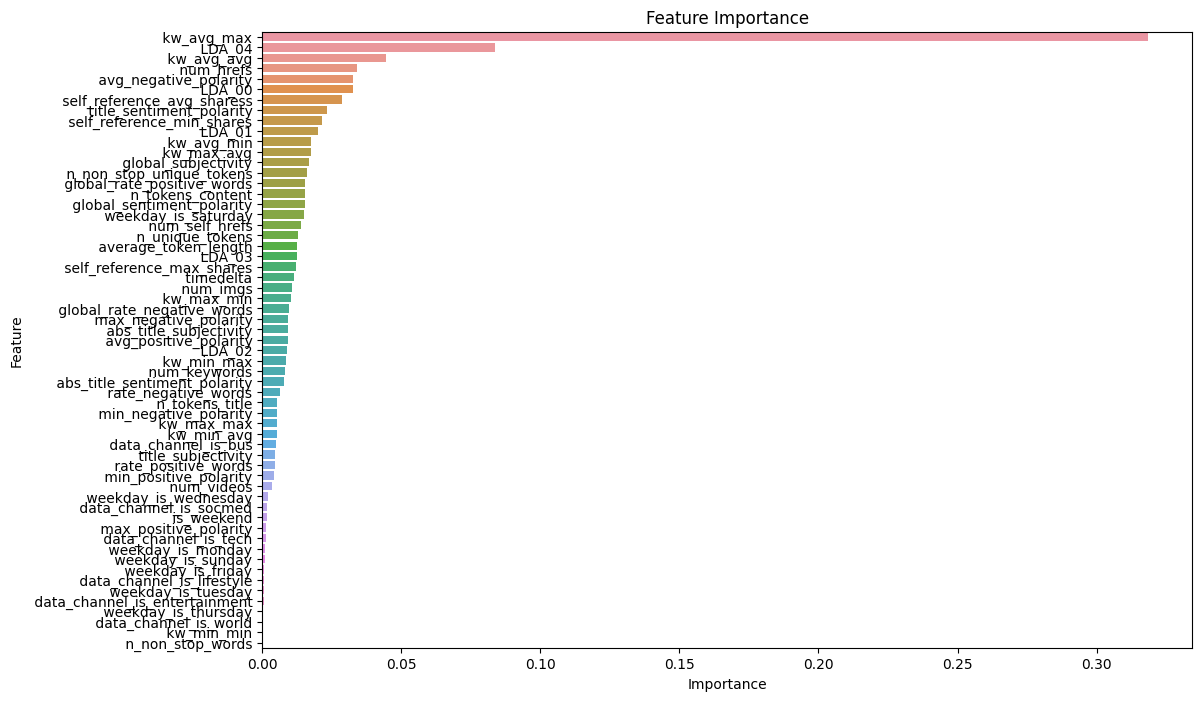

In [ ]:
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 30 features based on F-statistic
selector = SelectKBest(score_func=f_regression, k=30)
X_new = selector.fit_transform(X, y)


In [ ]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the selected feature indices
print("Indices of selected features:", selected_feature_indices)

Indices of selected features: [ 0  5  6  8 13 14 15 17 21 22 23 24 25 26 27 28 29 30 31 35 37 40 41 42
 52 53 54 55 56 58]


In [ ]:
# To get the names of the selected features (assuming X is a DataFrame)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected feature names:", selected_feature_names)

Selected feature names: Index([' timedelta', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_imgs',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_world', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_saturday',
       ' is_weekend', ' LDA_02', ' LDA_03', ' LDA_04',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_sentiment_polarity'],
      dtype='object')


In [ ]:
# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_new, y)


RandomForestRegressor(random_state=0)

In [ ]:
# Transform the test data using the same feature selector
X_test_new = selector.transform(X_test)

# Make predictions
y_pred = rf_model.predict(X_test_new)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 12125503.832516108
R-squared (R2): 0.8584474211744275
Mean Absolute Error (MAE): 1019.150595065312
Root Mean Squared Error (RMSE): 3482.1694146775953


In [ ]:
# Import necessary libraries
from scipy import stats

# Shift the data to ensure it is positive
X_new_shifted = X_new - X_new.min() + 1  # Add 1 to ensure all values are positive
X_test_new_shifted = X_test_new - X_new.min() + 1  # Use the same shift for test data

# Apply Box-Cox transformation to each feature in X_new_shifted and X_test_new_shifted
X_new_transformed = np.zeros_like(X_new_shifted)
X_test_new_transformed = np.zeros_like(X_test_new_shifted)

for feature_idx in range(X_new_shifted.shape[1]):
    X_new_transformed[:, feature_idx], lambda_optimal = stats.boxcox(X_new_shifted[:, feature_idx])
    X_test_new_transformed[:, feature_idx] = stats.boxcox(X_test_new_shifted[:, feature_idx], lmbda=lambda_optimal)  # Use the same lambda for the test data

# Initialize and fit the Random Forest model on the transformed features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_new_transformed, y)

# Make predictions
y_pred = rf_model.predict(X_test_new_transformed)

# Calculate evaluation metrics on the transformed data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Mean Squared Error (MSE): 8322435.680782581
R-squared (R2): 0.9028442653602891
Mean Absolute Error (MAE): 1043.0242089985486
Root Mean Squared Error (RMSE): 2884.863199665208


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
from sklearn.model_selection import KFold

# Define the cross-validation method (5-fold in this example)
cv = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
scoring = make_scorer(mean_squared_error)
mse_scores = cross_val_score(rf_model, X_new_transformed, y, cv=cv, scoring=scoring)

In [ ]:
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Standard Deviation of MSE: {mse_scores.std()}')


Mean MSE: 176867983.23385957
Standard Deviation of MSE: 207922039.34545776


In [ ]:
# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
# Perform grid search within each fold of cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


In [ ]:
# Calculate and print results
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Standard Deviation of MSE: {mse_scores.std()}')

Mean MSE: 176867983.23385957
Standard Deviation of MSE: 207922039.34545776


In [ ]:
# Once the best hyperparameters are found, you can fit the final model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
# Transform the test data using the optimal lambda
X_test_transformed, _ = stats.boxcox(X_test, lmbda=lambda_optimal)

In [ ]:
# Make predictions on the test data
y_pred = best_model.predict(X_test_transformed)

In [ ]:
# Calculate evaluation metrics on the transformed test data
mse = mean_squared_error(y_test, y_pred)

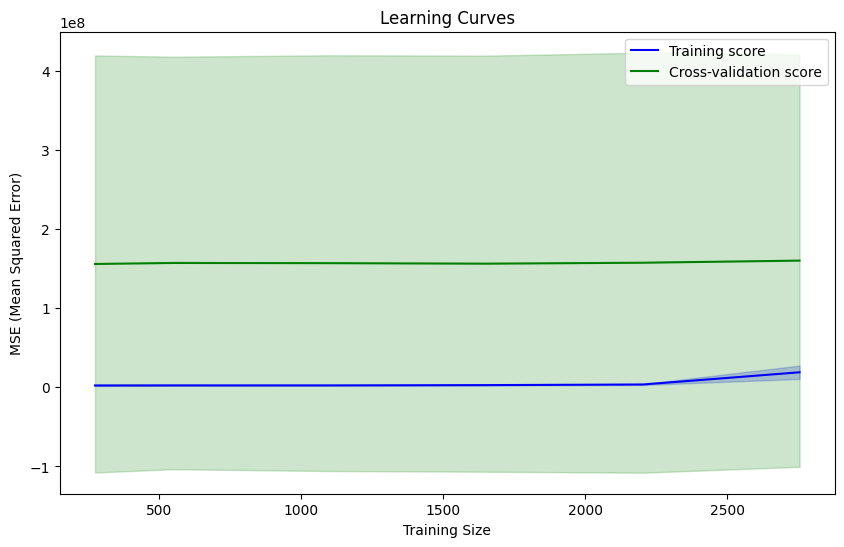

In [ ]:
from sklearn.model_selection import learning_curve

# Define your model (already fitted model)
model = rf_model

# Create learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0], scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of training and test scores
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='g')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.2)
plt.xlabel('Training Size')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('Learning Curves')
plt.legend()
plt.show()


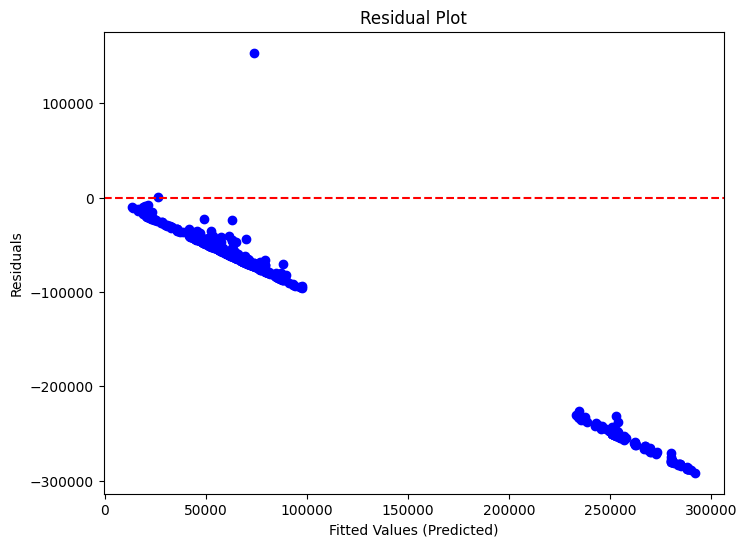

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
y_pred = rf_model.predict(X_test_new)
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
from scipy import stats

# Visualize data distributions using box plots for selected features
selected_features = [' num_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_max_min',
       ' kw_avg_min', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' rate_positive_words',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_sentiment_polarity']
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot for {feature}')
    plt.show()

# Calculate Z-scores for all numerical features
z_scores = np.abs(stats.zscore(df))
threshold = 3  # adjustable threshold as needed

# Find outliers based on Z-scores
outliers = np.where(z_scores > threshold)

# Display the indices of outliers
outlier_indices = list(set(outliers[0]))
print("Outlier Indices:", outlier_indices)

# Calculate IQR for selected features
for feature in selected_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers based on IQR
    iqr_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Outliers based on IQR for {feature}:", iqr_outliers.shape[0])